In [6]:
import pandas
import matplotlib
import numpy

df = pandas.read_csv('movie_statistic_dataset.csv')
df.head()



,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [7]:
df.describe()

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
count,4380.000000,4380.000000,4.380000e+03,4380.000000,4.380000e+03,4.380000e+03,4.380000e+03
mean,109.786073,6.407443,1.369603e+05,5.032633,3.869377e+07,5.256385e+07,1.149192e+08
std,20.375581,1.024000,2.150757e+05,1.384890,4.573772e+07,7.508813e+07,2.006894e+08
min,63.000000,1.500000,5.000000e+00,0.395487,5.000000e+04,2.640000e+02,4.230000e+02
25%,96.000000,5.800000,2.140650e+04,4.178267,1.000000e+07,8.866234e+06,1.299260e+07
50%,106.000000,6.500000,6.497950e+04,5.039369,2.300000e+07,2.832282e+07,4.448247e+07
75%,120.000000,7.100000,1.598605e+05,5.944203,5.000000e+07,6.410166e+07,1.280182e+08
max,271.000000,9.300000,2.695887e+06,10.000000,4.600000e+08,8.583730e+08,2.923706e+09


<Axes: xlabel='director_name', ylabel='Worldwide gross $'>

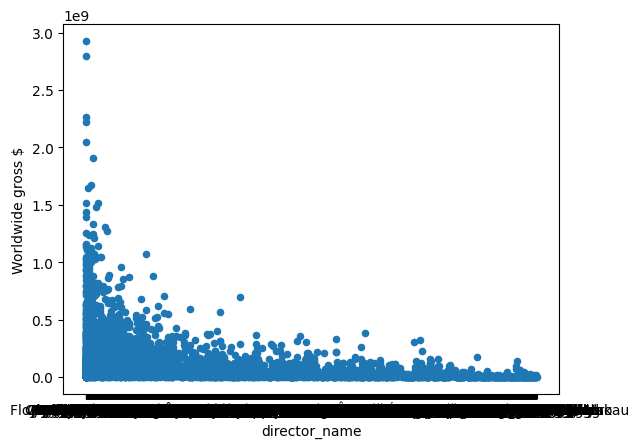

In [8]:
df.plot.scatter(x='director_name', y='Worldwide gross $')

In [10]:
userin = input()
currentyear = df[df["production_date"] >= userin]
currentyear.head()

 2020-01-01


,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
14,Thor: Love and Thunder,2022-07-01,"Action,Adventure,Comedy",118.0,Taika Waititi,"producer,writer,actor",1975,alive,6.3,340924.0,5.773184,250000000,343256830,760928081
19,No Time to Die,2021-09-29,"Action,Adventure,Thriller",163.0,Cary Joji Fukunaga,"producer,director,writer",1977,alive,7.3,407964.0,6.806908,250000000,160891007,759959662
40,Tenet,2020-08-26,"Action,Sci-Fi,Thriller",150.0,Christopher Nolan,"writer,producer,director",1970,alive,7.3,514633.0,6.931662,205000000,58504105,360240189
41,Spider-Man: No Way Home,2021-12-14,"Action,Adventure,Fantasy",148.0,Jon Watts,"director,producer,writer",1981,alive,8.2,766560.0,8.042900,200000000,814115070,1910048245
